NAMA: ERIK SAPUTRA RIFKI

NPM: 24083010069

- DETAIL ARTIKEL

Judul: Peran Digitalisasi terhadap Kewirausahaan Digital: Tinjauan Literatur dan Arah Penelitian Masa Depan

DOI: https://doi.org/10.35794/jmbi.v9i2.41351

Negara: Indonesia

Penulis: Egi Radiansyah

Sumber: Jurnal Ilmiah Akuntansi dan Bisnis (JIAB), 2022

In [47]:
import pandas as pd

df = pd.read_csv("Analisis Bagian Artikel.csv")
df

,Bagian,Isi
0,Judul Artikel,PERAN DIGITALISASI TERHADAP KEWIRAUSAHAAN DIGI...
1,DOI,https://doi.org/10.35794/jmbi.v9i2.41351
2,Negara,Indonesia
3,Abstrak,Integrasi teknologi yang belum pernah terjadi ...
4,Pendahuluan,Teknologi digital telah mengubah cara bisnis-k...
5,kesimpulan,Karena kewirausahaan digital berfokus secara l...


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Gabungkan hanya bagian yang berisi isi ilmiah (Abstrak, Pendahuluan, Kesimpulan)
text = " ".join(df.loc[df["Bagian"].isin(["Abstrak", "Pendahuluan", "Kesimpulan"]), "Isi"].astype(str))
words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

# Hitung vokal & konsonan
data = []
for w in words:
    vokal = len(re.findall(r'[aeiou]', w))
    konsonan = len(re.findall(r'[bcdfghjklmnpqrstvwxyz]', w))
    data.append((w, vokal, konsonan))

df_words = pd.DataFrame(data, columns=["Kata", "Vokal", "Konsonan"])

Frekuensi kombinasi vokal-konsonan:


Konsonan,0,1,2,3,4,5,6,7,8,9,10
Vokal,,,,,,,,,,,
1,0,16,25,11,0,0,0,0,0,0,0
2,1,8,35,41,30,3,0,0,0,0,0
3,0,0,8,14,29,16,12,1,1,0,0
4,0,0,1,9,15,27,14,10,9,2,0
5,0,0,0,0,6,14,6,1,5,0,1
6,0,0,0,0,0,0,6,1,0,0,0


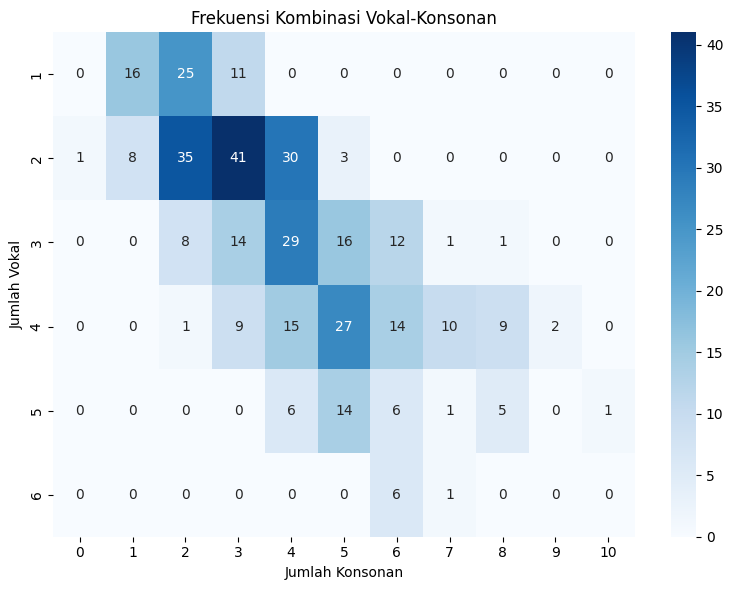

In [49]:
# FREKUENSI KOMBINASI
pivot_freq = df_words.pivot_table(index="Vokal", columns="Konsonan", values="Kata", aggfunc="count", fill_value=0)
print("Frekuensi kombinasi vokal-konsonan:")
display(pivot_freq)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_freq, annot=True, cmap="Blues")
plt.title("Frekuensi Kombinasi Vokal-Konsonan")
plt.xlabel("Jumlah Konsonan")
plt.ylabel("Jumlah Vokal")
plt.tight_layout()
plt.show()

Cacah kata unik dalam tiap kombinasi vokal-konsonan:


Konsonan,0,1,2,3,4,5,6,7,8,9,10
Vokal,,,,,,,,,,,
1,0,4,3,2,0,0,0,0,0,0,0
2,1,4,20,22,14,2,0,0,0,0,0
3,0,0,4,8,16,15,7,1,1,0,0
4,0,0,1,3,10,14,11,5,3,2,0
5,0,0,0,0,3,3,5,1,3,0,1
6,0,0,0,0,0,0,2,1,0,0,0


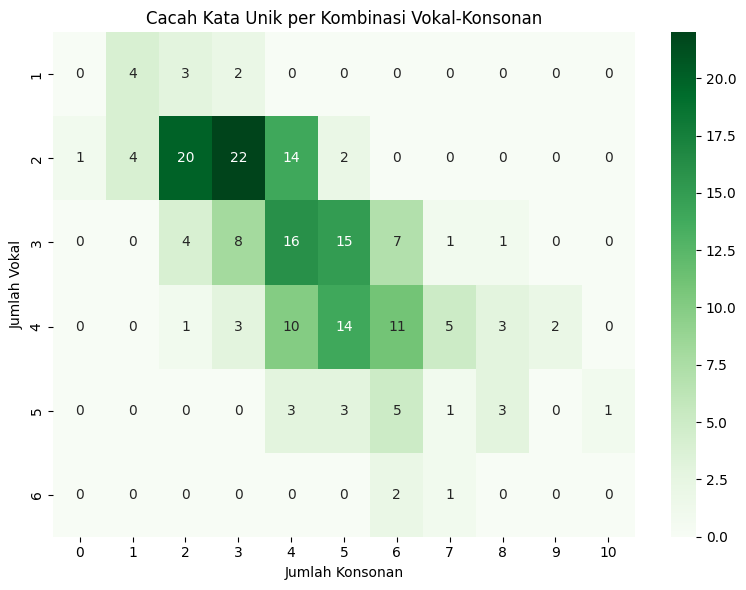

In [50]:
# CACAH KATA UNIK per kombinasi
pivot_unique = df_words.drop_duplicates(subset="Kata").pivot_table(
    index="Vokal", columns="Konsonan", values="Kata", aggfunc="count", fill_value=0
)
print("Cacah kata unik dalam tiap kombinasi vokal-konsonan:")
display(pivot_unique)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_unique, annot=True, cmap="Greens")
plt.title("Cacah Kata Unik per Kombinasi Vokal-Konsonan")
plt.xlabel("Jumlah Konsonan")
plt.ylabel("Jumlah Vokal")
plt.tight_layout()
plt.show()

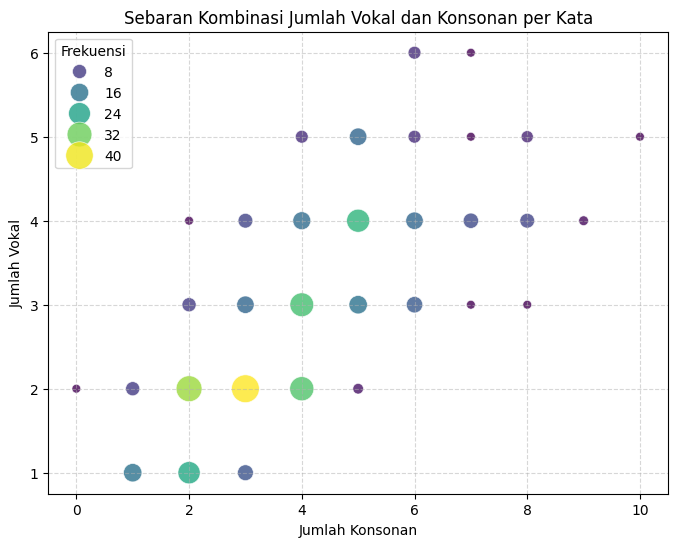

In [51]:
# Hitung frekuensi kombinasi
combo = df_words.groupby(["Vokal", "Konsonan"]).size().reset_index(name="Frekuensi")

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=combo,
    x="Konsonan",
    y="Vokal",
    size="Frekuensi",
    hue="Frekuensi",
    palette="viridis",
    sizes=(40, 400),
    alpha=0.8
)
plt.title("Sebaran Kombinasi Jumlah Vokal dan Konsonan per Kata")
plt.xlabel("Jumlah Konsonan")
plt.ylabel("Jumlah Vokal")
plt.legend(title="Frekuensi")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Distribusi kombinasi konsonan–vokal menunjukkan bahwa vokal tengah (baris ke-2 dan ke-3) memiliki frekuensi paling tinggi daripada yang lain.

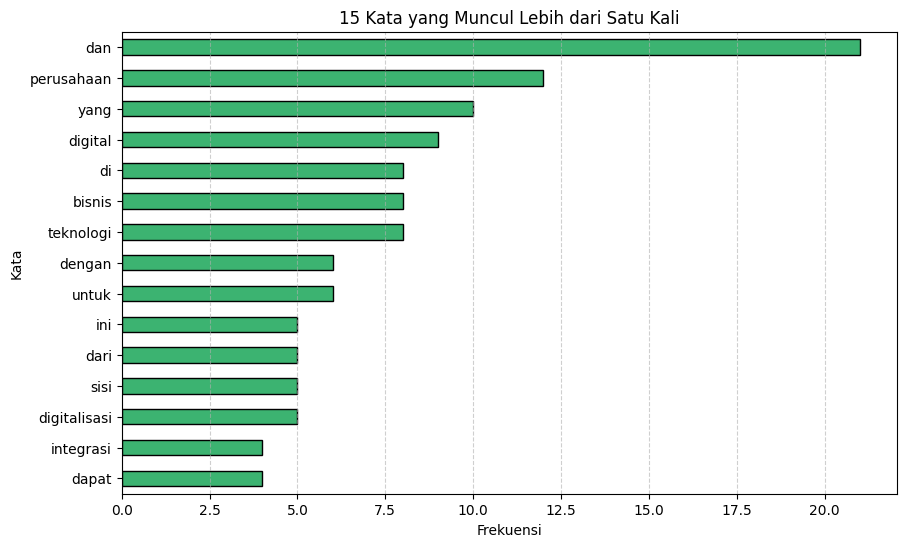

In [52]:
plt.figure(figsize=(10,6))
duplicate_words.head(15).sort_values(ascending=True).plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.title("15 Kata yang Muncul Lebih dari Satu Kali")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Gambar tersebut menunjukkan 15 kata yang paling sering muncul, terlihat bahwa kata "dan" paling sering muncul serta hampir 2x lipat lebih sering daripada kata "perusahaan" yang berada di urutan kedua.

In [53]:
# Frekuensi kemunculan tiap kata
word_counts = df_words["Kata"].value_counts()

# Kata yang unik
unique_words = word_counts[word_counts == 1]
print("Kata yang unik:")
display(unique_words)

Kata yang unik:


,count
Kata,
pemimpin,1
baik,1
efek,1
pengaruh,1
rentan,1
...,...
terutama,1
pada,1
menciptakan,1


Untuk kata unik sejumlah 120 kata

In [54]:
# Bersihkan kutipan penulis & tahun
clean_text = text
clean_text = re.sub(r"\b[A-Z][a-z]+ et al\. \(\d{4}\)", "", clean_text)
clean_text = re.sub(r"\([A-Z][a-z]+( & [A-Z][a-z]+)?, \d{4}\)", "", clean_text)
clean_text = re.sub(r"\([A-Za-z&;, ]+$", "", clean_text)
clean_text = re.sub(r"^\([A-Za-z&;, ]+\)", "", clean_text)
clean_text = re.sub(r",[ ]?\d{4}\)", "", clean_text)
clean_text = re.sub(r"\(\d{4}\)", "", clean_text)

# Pisahkan teks jadi kalimat berdasarkan tanda titik, tanda tanya, tanda seru
kalimat = re.split(r'(?<=[.!?])\s+(?=[A-Z])', clean_text)
kalimat = [k.strip() for k in kalimat if k.strip() != ""]

# Hitung jumlah kata per kalimat
jumlah_kata = [len(re.findall(r'\b[a-zA-Z]+\b', k)) for k in kalimat]

df_kalimat = pd.DataFrame({
    "Kalimat": kalimat,
    "Jumlah_Kata": jumlah_kata
})

print("Contoh beberapa kalimat:")
display(df_kalimat.head(10))

Contoh beberapa kalimat:


,Kalimat,Jumlah_Kata
0,Integrasi teknologi yang belum pernah terjadi ...,25
1,"Secara sederhana, digitalisasi dapat dilihat s...",40
2,"Tantangan, peluang, dan efek digitalisasi memi...",15
3,Hal ini memerlukan perhatian dari para peneliti.,7
4,"Misalnya, integrasi rentan terhadap tantangan,...",14
5,"Oleh karena itu, peneliti perlu mempelajari te...",24
6,Teknologi digital telah mengubah cara bisnis-k...,28
7,"Saat ini, sebagian besar chief executive offic...",37
8,Penerapan beragam teknologi digital seperti Ar...,31
9,Teknologi ini juga mendukung perpanjangan masa...,26


Ini berfungsi untuk menghapus kutipan penulis dan tahun seperti (Egi et al., 2023) atau (Syam & Wibowo, 2018) agar tidak mengganggu analisis struktur kalimat.
Kutipan semacam itu bukan bagian dari isi kalimat utama, melainkan referensi yang bisa menambah panjang kalimat secara semu.
Setelah dibersihkan, teks dipisahkan berdasarkan tanda titik, tanya, dan seru untuk memperoleh batas kalimat yang sebenarnya, sehingga perhitungan jumlah kata per kalimat menjadi lebih akurat dan representatif terhadap isi ilmiah artikel.

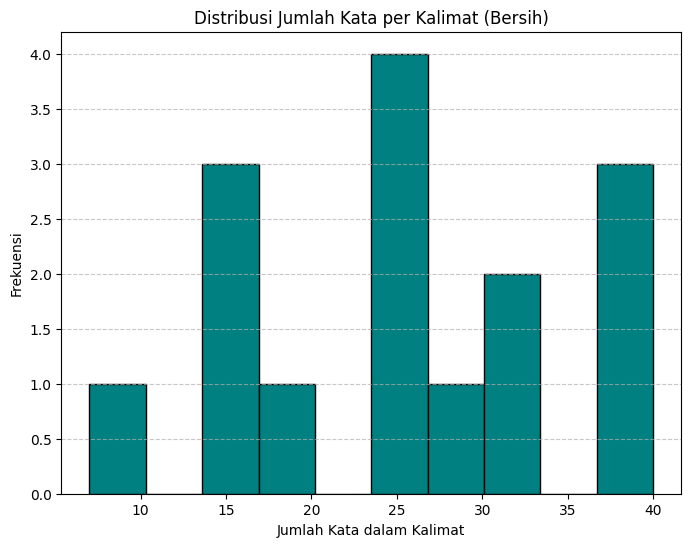

In [55]:
plt.figure(figsize=(8,6))
plt.hist(df_kalimat["Jumlah_Kata"], bins=10, color="teal", edgecolor="black")
plt.title("Distribusi Jumlah Kata per Kalimat (Bersih)")
plt.xlabel("Jumlah Kata dalam Kalimat")
plt.ylabel("Frekuensi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

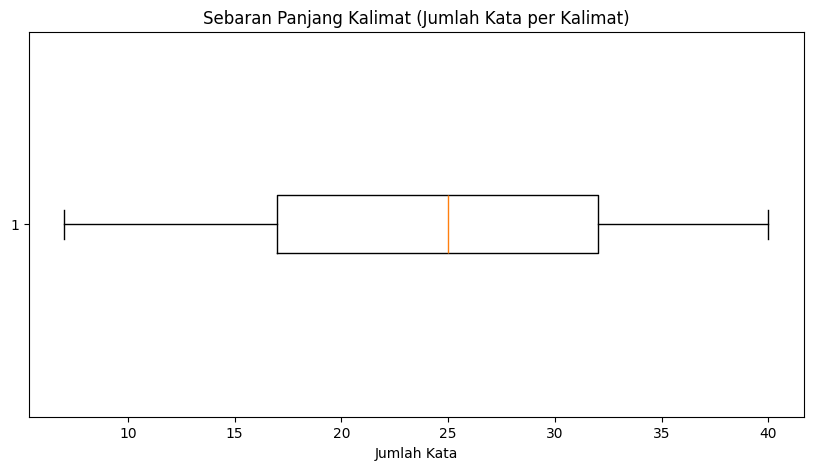

In [56]:
plt.figure(figsize=(10,5))
plt.boxplot(df_kalimat["Jumlah_Kata"], vert=False)
plt.title("Sebaran Panjang Kalimat (Jumlah Kata per Kalimat)")
plt.xlabel("Jumlah Kata")
plt.show()

Gambar di atas menunjukkan sebaran jumlah kata dalam setiap kalimat artikel.
Median panjang kalimat berada di sekitar 25 kata, yang menandakan gaya penulisan akademik dengan struktur kalimat sedang hingga panjang.
Nilai minimum sekitar 7 kata, sedangkan maksimum sekitar 40 kata, menunjukkan adanya variasi kompleksitas kalimat.

In [57]:
# Hitung statistik dasar
rata2 = df_kalimat["Jumlah_Kata"].mean()
maks = df_kalimat["Jumlah_Kata"].max()
minn = df_kalimat["Jumlah_Kata"].min()

# Ambil kalimat terpendek & terpanjang
kalimat_pendek = df_kalimat[df_kalimat["Jumlah_Kata"] == minn]["Kalimat"].values
kalimat_panjang = df_kalimat[df_kalimat["Jumlah_Kata"] == maks]["Kalimat"].values

print(f"Statistik Jumlah Kata per Kalimat")
print(f"Rata-rata  : {rata2:.2f} kata per kalimat")
print(f"Terpendek  : {minn} kata")
print(f"Terpanjang : {maks} kata")

print("Kalimat Terpendek:")
for k in kalimat_pendek:
    print("•", k.strip())

print("Kalimat Terpanjang:")
for k in kalimat_panjang:
    print("•", k.strip())

Statistik Jumlah Kata per Kalimat
Rata-rata  : 25.07 kata per kalimat
Terpendek  : 7 kata
Terpanjang : 40 kata
Kalimat Terpendek:
• Hal ini memerlukan perhatian dari para peneliti.
Kalimat Terpanjang:
• Secara sederhana, digitalisasi dapat dilihat sebagai peningkatan generasi, analisis, dan penggunaan data, di satu sisi juga untuk meningkatkan efisiensi internal perusahaan, dan di sisi lain untuk menumbuhkan perusahaan dengan menambahkan nilai bagi pelanggan melalui perubahan dari format analog ke digital.


In [58]:
top10 = df_kalimat.sort_values(by="Jumlah_Kata", ascending=False).head(10)
display(top10[["Kalimat", "Jumlah_Kata"]])

,Kalimat,Jumlah_Kata
1,"Secara sederhana, digitalisasi dapat dilihat s...",40
14,"Secara sederhana, digitalisasi dapat dilihat s...",39
7,"Saat ini, sebagian besar chief executive offic...",37
11,Integrasi teknologi yang belum pernah terjadi ...,33
8,Penerapan beragam teknologi digital seperti Ar...,31
6,Teknologi digital telah mengubah cara bisnis-k...,28
9,Teknologi ini juga mendukung perpanjangan masa...,26
0,Integrasi teknologi yang belum pernah terjadi ...,25
10,Perusahaan yang bergerak menuju digitalisasi d...,24
5,"Oleh karena itu, peneliti perlu mempelajari te...",24


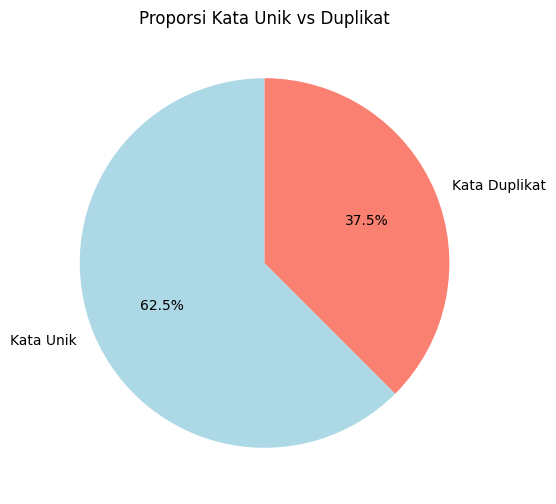

In [59]:
labels = ['Kata Unik', 'Kata Duplikat']
sizes = [len(unique_words), len(duplicate_words)]
colors = ['lightblue', 'salmon']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Proporsi Kata Unik vs Duplikat")
plt.show()

Visualisasi ini menggambarkan bahwa sebagian besar kata bersifat unik,
menandakan variasi kosakata yang tinggi dalam artikel ilmiah.

In [60]:
# Pilih bagian
selected = df.loc[df["Bagian"].isin(["Abstrak", "Pendahuluan", "kesimpulan"]), "Isi"].astype(str)

# Pecah paragraf berdasarkan newline
paragraf_list = []
for isi in selected:
    parts = re.split(r'\n+', isi)
    for p in parts:
        if len(p.strip()) > 50:
            paragraf_list.append(p.strip())

# Fungsi hitung kalimat
def hitung_kalimat(teks):
    # Lindungi singkatan umum
    teks = re.sub(r'\b(?:Dr|Prof|No|dsb|dll|dkk|et al)\.', lambda m: m.group(0).replace('.', '<DOT>'), teks)
    # Pisahkan di titik/seru/tanya yang diikuti spasi + huruf besar
    kalimat = re.split(r'(?<=[.!?])\s+(?=[A-Z])', teks)
    # Balikin titik singkatan
    kalimat = [k.replace('<DOT>', '.') for k in kalimat]
    # Bersihkan kalimat kosong
    return len([k for k in kalimat if len(k.strip()) > 3])

# Hitung jumlah kalimat per paragraf
kalimat_count = [hitung_kalimat(p) for p in paragraf_list]

df_paragraf = pd.DataFrame({
    "Paragraf": range(1, len(kalimat_count)+1),
    "Jumlah_Kalimat": kalimat_count
})

print(df_paragraf)
print("Total paragraf terdeteksi:", len(df_paragraf))
print("Rata-rata kalimat per paragraf:", round(df_paragraf['Jumlah_Kalimat'].mean(), 2))
print("Paragraf terbanyak kalimat:", df_paragraf['Jumlah_Kalimat'].max())
print("Paragraf tersedikit kalimat:", df_paragraf['Jumlah_Kalimat'].min())

   Paragraf  Jumlah_Kalimat
0         1               6
1         2               2
2         3               4
3         4               3
4         5               3
5         6               3
6         7               1
Total paragraf terdeteksi: 7
Rata-rata kalimat per paragraf: 3.14
Paragraf terbanyak kalimat: 6
Paragraf tersedikit kalimat: 1


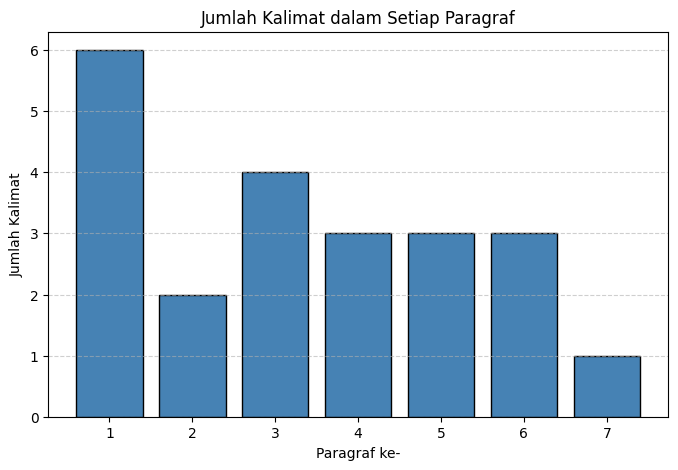

In [61]:
# Bar Chart
plt.figure(figsize=(8,5))
plt.bar(df_paragraf["Paragraf"], df_paragraf["Jumlah_Kalimat"], color="steelblue", edgecolor="black")
plt.title("Jumlah Kalimat dalam Setiap Paragraf")
plt.xlabel("Paragraf ke-")
plt.ylabel("Jumlah Kalimat")
plt.xticks(df_paragraf["Paragraf"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Bagian artikel yang dianalisis terdiri atas tujuh paragraf dengan rata-rata sekitar tiga kalimat per paragraf.
Paragraf pertama paling panjang dengan enam kalimat, sedangkan paragraf ketujuh hanya satu kalimat.

- Kesimpulan

Artikel ini menunjukkan bahwa tulisan ilmiah sebenarnya punya pola yang teratur.
Pemilihan huruf, panjang kalimat, dan struktur paragraf mengikuti ritme yang logis dan konsisten.
Artinya, penulis tidak hanya menyampaikan ide, tapi juga secara tidak sadar membangun pola berpikir yang bisa dilihat lewat data.
Analisis ini membantu kita memahami bagaimana cara berpikir ilmiah tercermin lewat bahasa yang tertulis.